In [2]:
data = [453, 736, 939, 7864, 11693, 34000, 47887, 66687, 85000, 289318, 302349, 903708]
labels = ["Basque", "Urdu", "Slovene", "Brazilian Portuguese","German","Spanish","Danish","Italian","Japanese","Russian","French","English"]

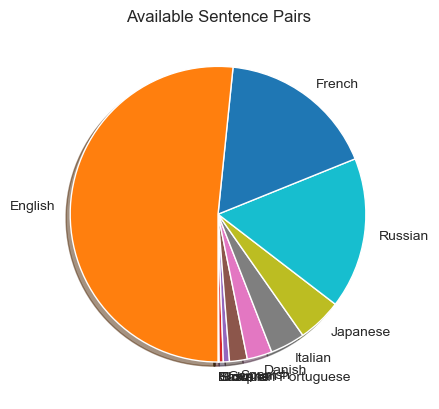

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

# Data to be plotted in the pie chart
total = sum(data)

def make_autopct(pct):
    val = int(round(pct*total/100.0))
    lbl = labels[data.index(val)]
    return lbl + " (" + str(round(pct,1)) + "%)"

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(data, labels=labels, shadow=True, startangle=270)

# Set the pie chart title
plt.title("Available Sentence Pairs")

# Display the pie chart
plt.show()



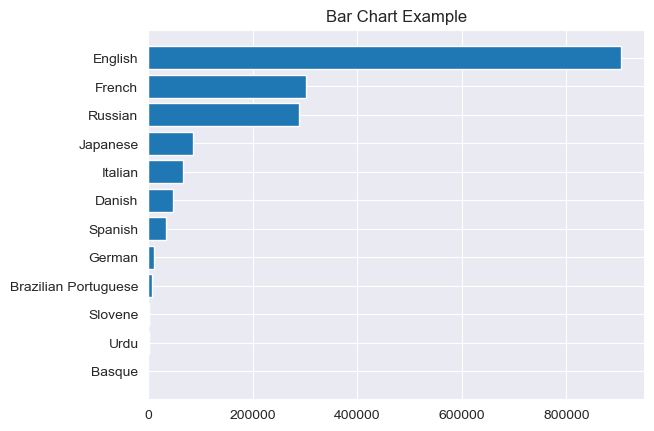

In [5]:
%matplotlib inline

# Create the bar chart
fig, ax = plt.subplots()
ax.barh(labels, data)

# Set the bar chart title
plt.title("Bar Chart Example")

# Display the bar chart
plt.show()

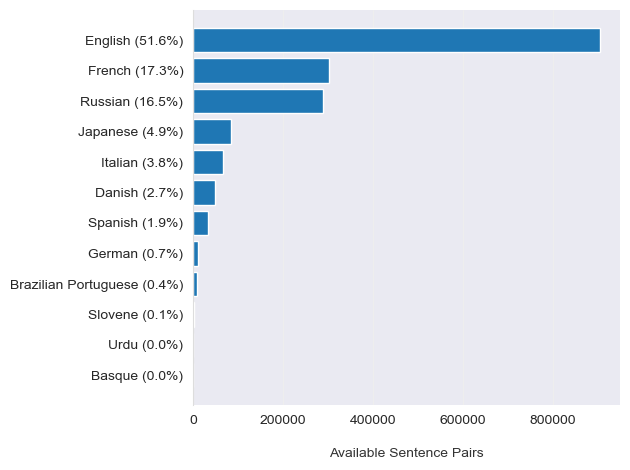

In [6]:
fig, ax = plt.subplots()

labels_updated = [lbl + " (" + str(round((val/total)*100.0,1)) + "%)" for lbl, val in zip(labels, data)]

# Save the chart so we can loop through the bars below.
bars = ax.barh(
    labels_updated,
    data
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')

# Grab the color of the bars so we can make the
# text the same color.
bar_color = bars[0].get_facecolor()

ax.set_xlabel('Available Sentence Pairs', labelpad=15, color='#333333')

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
# for bar in bars:
#   ax.text(
#       bar.get_width(),
#       bar.get_y() + bar.get_height() / 2,
#       round(bar.get_width()/total, 1),
#       horizontalalignment='center',
#       verticalalignment='center',
#       color=bar_color,
#       weight='bold'
#   )

fig.tight_layout()

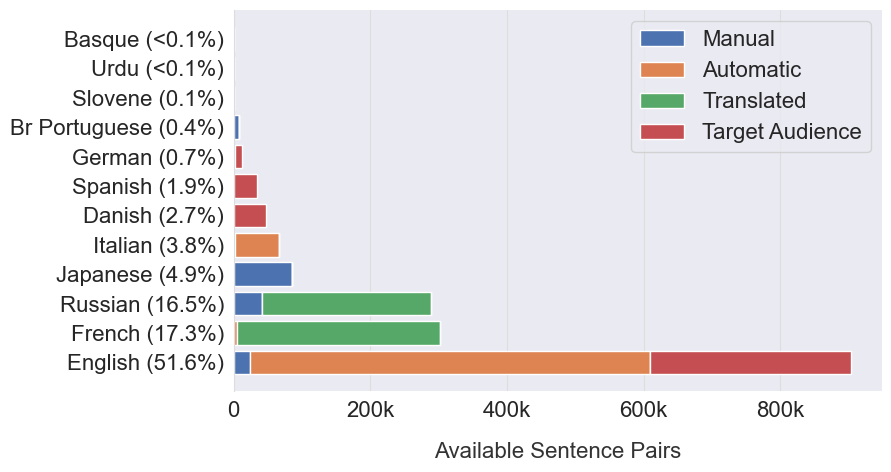

In [21]:
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

category_names = ['Manual', 'Automatic', 'Translated', 'Target Audience']
results = {
    'Basque (<0.1%)': [453,0,0,0],
    'Urdu (<0.1%)': [736,0,0,0],
    'Slovene (0.1%)': [0,0,0,939],
    'Br Portuguese (0.4%)': [7864,0,0,0],
    'German (0.7%)': [1460,0,0,10233],
    'Spanish (1.9%)': [922,0,0,33078],
    'Danish (2.7%)': [0,0,0,47887],
    'Italian (3.8%)': [1918,64769,0,0],
    'Japanese (4.9%)': [85000,0,0,0],
    'Russian (16.5%)': [41207,0,248111,0],
    'French (17.3%)': [0,4596,297753,0],
    'English (51.6%)': [23590,586150,0,293968]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    plt.rcParams.update({'font.size': 16})
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = sns.color_palette('deep')

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDDDDD')
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(True, color='#DDDDDD')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts,
                label=colname, color=color)
        xcenters = starts + widths / 2

        # r, g, b, _ = color
        # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # for y, (x, c) in enumerate(zip(xcenters, widths)):
        #     ax.text(x, y, str(int(c)), ha='center', va='center',
        #             color=text_color)
    ax.legend(fontsize=16)

    ax.set_xlabel('Available Sentence Pairs', labelpad=15, color='#333333', fontsize=16)

    plt.xticks(np.arange(0, 1000000, 200000), ['0', '200k', '400k', '600k', '800k'])  # Set text labels.

    fig.tight_layout()

    return fig, ax


survey(results, category_names)
plt.savefig("../output/misc/ds_stacked.pdf", bbox_inches='tight', pad_inches=0)  

In [19]:
results_domain = {
    'Government (<0.1%)': [736,0,0,0],
    'Medical (0.3%)': [0,4596,0,0],
    'Science (0.5%)': [8317,0,0,0],
    'Encyclopedic (0.6%)': [9729,0,0,0],
    'Literature (1.5%)': [0,26460,0,0],
    'Websites (8.5%)': [85170,0,0,63006],
    'News (27.5%)': [95720,0,0,385000],
    'Wikipedia (66.8%)': [30394,591321,545864,0]
}

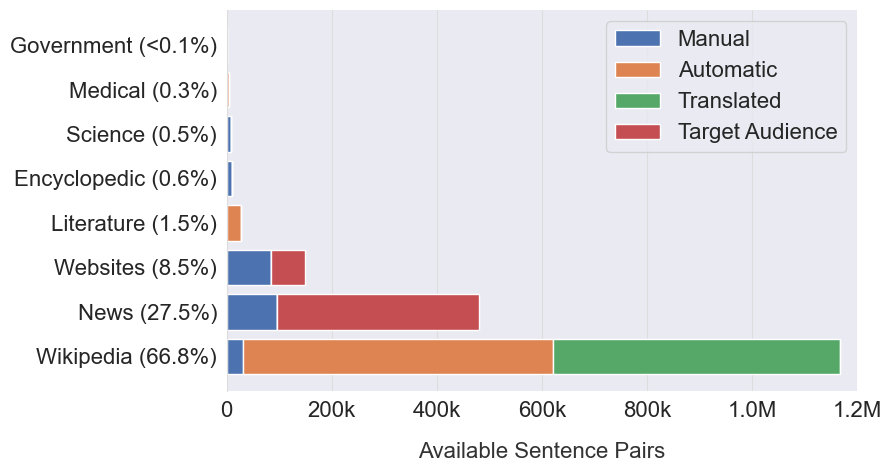

In [20]:
survey(results_domain, category_names)
plt.savefig("../output/misc/ds_domain_stacked.pdf")#, bbox_inches='tight', pad_inches=0)  

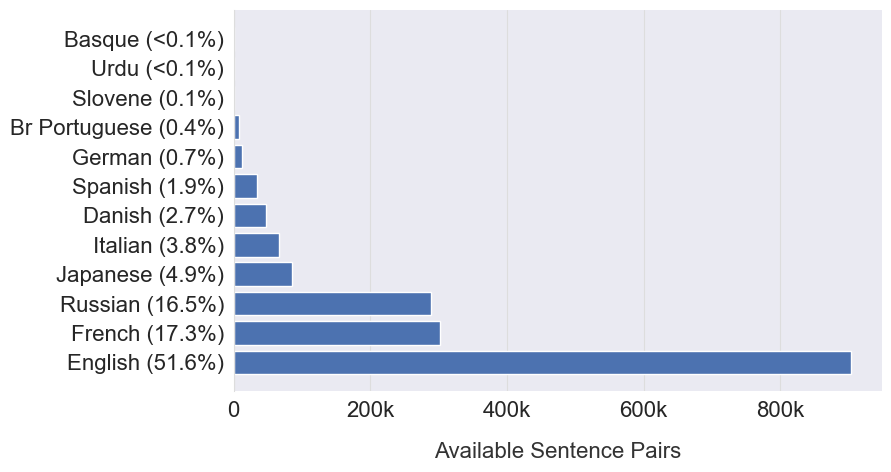

In [8]:
survey({k: [sum(v)] for k,v in results.items()}, ["Sentence Pairs"])
plt.savefig("../output/misc/ds_no_categories.pdf", bbox_inches='tight', pad_inches=0) 

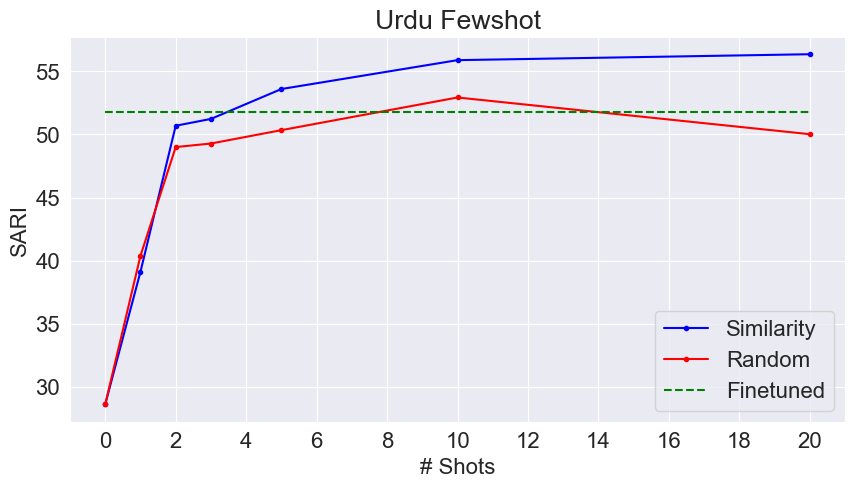

In [6]:
import matplotlib.pyplot as plt

# Series 1 data
k = [0, 1, 2, 3, 5, 10, 20]

urdu_sim = [28.61, 39.12, 50.69, 51.23, 53.60, 55.89, 56.36]
urdu_rand = [28.61, 40.38, 49.00, 49.28, 50.34, 52.93, 50.02]
urdu_finetuned = [51.74, 51.74, 51.74, 51.74, 51.74, 51.74, 51.74]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(k, urdu_sim, linestyle='solid', color='blue', marker=".")
ax.plot(k, urdu_rand, linestyle='solid', color='red', marker=".")
ax.plot(k, urdu_finetuned, linestyle='dashed', color='green')
ax.set_xticks(range(k[0], k[-1]+1, 2))
ax.set_title('Urdu Fewshot')
ax.set_xlabel('# Shots')
ax.set_ylabel('SARI')
ax.legend(['Similarity', 'Random', "Finetuned"], loc='lower right')
plt.show()

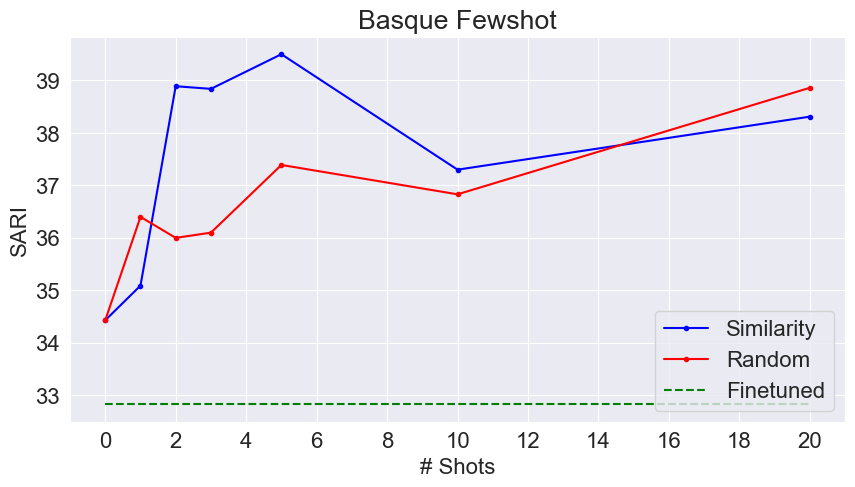

In [7]:
import matplotlib.pyplot as plt

# Series 1 data
k = [0, 1, 2, 3, 5, 10, 20]

basque_sim = [34.43, 35.09, 38.89, 38.84, 39.50, 37.30, 38.31]
basque_rand = [34.43, 36.40, 36.00, 36.10, 37.39, 36.83, 38.86]
basque_finetuned = [32.83, 32.83, 32.83, 32.83, 32.83, 32.83, 32.83]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(k, basque_sim, linestyle='solid', color='blue', marker=".")
ax.plot(k, basque_rand, linestyle='solid', color='red', marker=".")
ax.plot(k, basque_finetuned, linestyle='dashed', color='green')
ax.set_xticks(range(k[0], k[-1]+1, 2))
ax.set_title('Basque Fewshot')
ax.set_xlabel('# Shots')
ax.set_ylabel('SARI')
ax.legend(['Similarity', 'Random', "Finetuned"], loc='lower right')
plt.show()

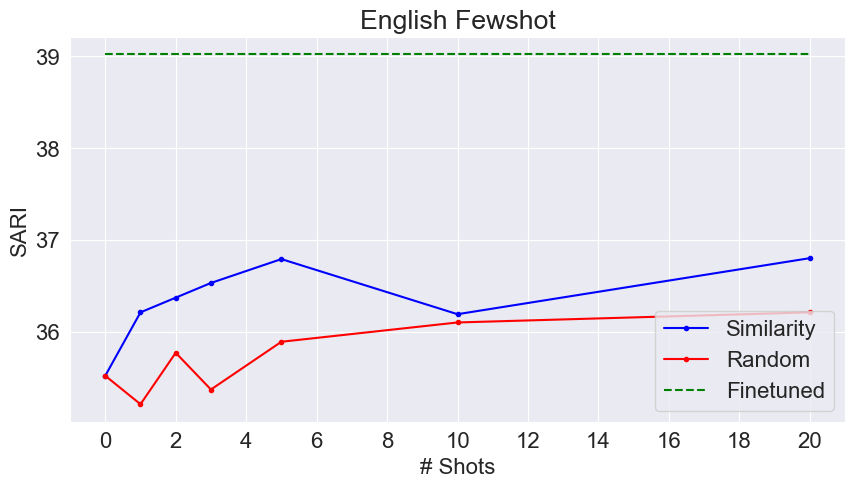

In [8]:
import matplotlib.pyplot as plt

# Series 1 data
k = [0, 1, 2, 3, 5, 10, 20]

asset_sim = [35.52,36.21,36.37,36.53,36.79,36.19,36.80]
asset_rand = [35.52,35.21,35.77,35.37,35.89,36.10,36.21]
asset_finetuned = [39.02,39.02,39.02,39.02,39.02,39.02,39.02]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(k, asset_sim, linestyle='solid', color='blue', marker=".")
ax.plot(k, asset_rand, linestyle='solid', color='red', marker=".")
ax.plot(k, asset_finetuned, linestyle='dashed', color='green')
ax.set_xticks(range(k[0], k[-1]+1, 2))
ax.set_title('English Fewshot')
ax.set_xlabel('# Shots')
ax.set_ylabel('SARI')
ax.legend(['Similarity', 'Random', "Finetuned"], loc='lower right')
plt.show()

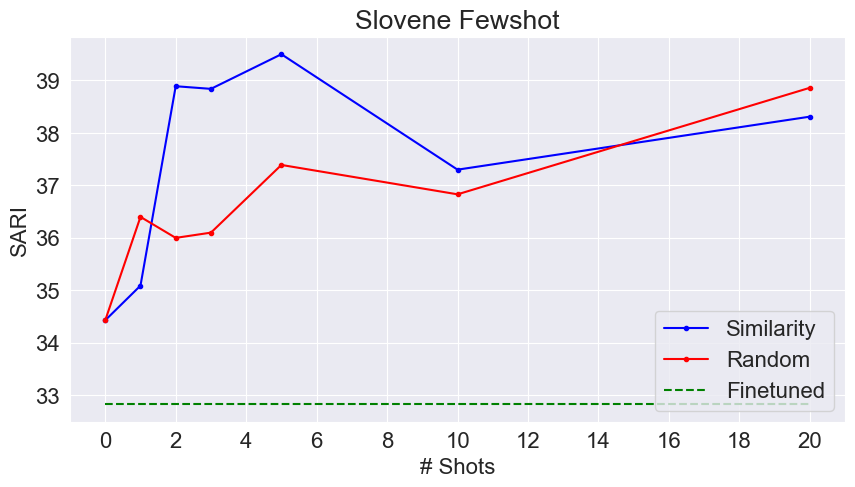

In [9]:
import matplotlib.pyplot as plt

# Series 1 data
k = [0, 1, 2, 3, 5, 10, 20]

slots_sim = [27.37, 30.75, 37.38, 37.20, 37.55, 36.91, 37.24]
slots_rand = [27.37, 27.43, 31.83, 33.95, 33.60, 34.18, 35.30]
slots_finetuned = [30.52, 30.52, 30.52, 30.52, 30.52, 30.52, 30.52]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(k, basque_sim, linestyle='solid', color='blue', marker=".")
ax.plot(k, basque_rand, linestyle='solid', color='red', marker=".")
ax.plot(k, basque_finetuned, linestyle='dashed', color='green')
ax.set_xticks(range(k[0], k[-1]+1, 2))
ax.set_title('Slovene Fewshot')
ax.set_xlabel('# Shots')
ax.set_ylabel('SARI')
ax.legend(['Similarity', 'Random', "Finetuned"], loc='lower right')
plt.show()

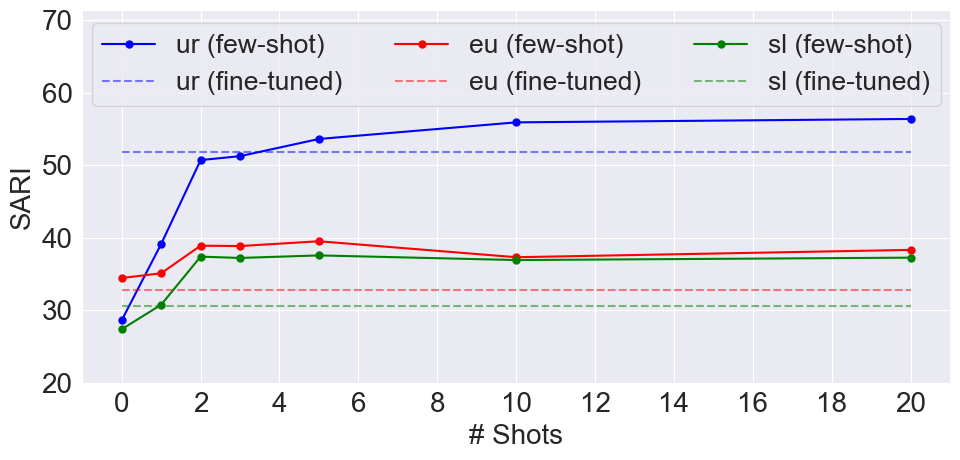

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rc('font', size=20)
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
fig, ax = plt.subplots(figsize=(10, 5), tight_layout=True)
ax.plot(k, urdu_sim, linestyle='solid', color='blue', marker=".", markersize=10)
ax.plot(k, urdu_finetuned, linestyle='dashed', color='blue', alpha=0.5)
ax.plot(k, basque_sim, linestyle='solid', color='red', marker=".", markersize=10)
ax.plot(k, basque_finetuned, linestyle='dashed', color='red', alpha=0.5)
ax.plot(k, slots_sim, linestyle='solid', color='green', marker=".", markersize=10)
ax.plot(k, slots_finetuned, linestyle='dashed', color='green', alpha=0.5)
ax.set_xticks(range(k[0], k[-1]+1, 2))
ax.set_xlabel('# Shots')
ax.set_ylabel('SARI')
ax.legend(['ur (few-shot)', 'ur (fine-tuned)', 'eu (few-shot)', 'eu (fine-tuned)', 'sl (few-shot)', 'sl (fine-tuned)'], loc='upper center', ncol=3, fontsize=19)
# plt.show()
ax.set_ylim([20, max(urdu_sim) + 15])
plt.savefig("../output/misc/low_resource_fewshot.pdf", bbox_inches='tight', pad_inches=0)  

In [62]:
data = {
    "EN" : {
        "ASSET": {
            "similarity": [35.52, 36.21, 36.37, 36.53, 36.79, 36.19, 36.80],
            "random": [35.52, 35.21, 35.77, 35.37, 35.89, 36.10, 36.21]
        },
        "NewselaEN": {
            "similarity": [33.22, 35.29, 37.70, 37.71, 38.82, 38.65, 39.26], 
            "random": [33.22, 34.02, 34.87, 34.31, 34.39, 35.35, 34.73]
        },
        "WikiAutoEN": {
            "similarity": [34.73, 40.24, 40.97, 41.66, 42.25, 42.66, 42.83],
            "random" : [0,0,0,0,0,0,0]
        }
    },
    "FR": {
        "WikiLargeFR": {
            "similarity": [35.71, 36.29, 35.22, 36.40, 36.75, 36.33, 37.72],
            "random": [35.71, 35.64, 36.67, 36.07, 36.17, 36.70, 35.80]
        },
        "CLEAR": {
            "similarity": [35.75, 38.06, 39.03, 40.16, 39.34, 39.21, 38.45],
            "random": [35.75, 36.12, 34.64, 36.92, 35.54, 35.80, 36.13]
        }
    },
    "RU" : {
        "RuWikiLarge": {
            "similarity": [31.47, 35.95, 36.93, 37.22, 36.84, 37.59, 37.71],
            "random": [31.47, 33.61, 34.20, 34.19, 32.89, 34.63, 34.63]
        },
        "RSSE": {
			"similarity": [20.09, 30.18, 29.75, 29.79, 31.08, 31.33, 31.22],
			"random": [20.09, 28.23, 28.44, 29.4, 29.3, 28.69, 29.6]
		},

		"RuAdapt Ency": {
			"similarity": [33.2, 40.21, 42.22, 40.76, 41.01, 39.45, 39.54],
			"random": [33.2, 33.45, 34.07, 34.24, 33.17, 33.19, 33.71]
		},

		"RuAdapt Fairy": {
			"similarity": [12.74, 33.49, 35.51, 37.07, 38.43, 40.93, 38.95],
			"random": [12.74, 20.89, 24.24, 22.84, 25.91, 29.16, 31.83]
		},

		"RuAdapt Lit": {
			"similarity": [30.95, 37.05, 37.61, 39.06, 39.89, 40.44, 40.32],
			"random": [30.95, 32.26, 33.14, 33.41, 33.45, 33.92, 33.89]
		},
	},
	"JA": {
		"Easy JA": {
			"similarity": [41.71, 48.71, 54.89, 55.38, 57.29, 58.67, 59.42],
			"random": [41.71, 38.35, 37.85, 35.9, 35.92, 39.34, 37.89]
		},

		"Easy JA Ext": {
			"similarity": [30.53, 46.08, 49.39, 47.01, 49.3, 47.5, 46.55],
			"random": [30.53, 40.7, 41.38, 40.04, 42.55, 42.5, 42.11]
		},
	},
	"IT": {
		"PaCCSS-IT": {
			"similarity": [35.42, 51.42, 49.15, 48.0, 45.48, 37.31, 33.45],
			"random": [35.42, 38.84, 39.11, 38.51, 37.41, 35.01, 30.29]
		},

		"Terence": {
			"similarity": [35.91, 34.95, 37.25, 34.95, 35.94, 35.39, 35.17],
			"random": [35.91, 33.6, 34.15, 33.96, 32.01, 31.6, 34.38]
		},

		"AdminIT": {
			"similarity": [32.43, 37.06, 36.69, 35.67, 38.16, 35.21, 35.21],
			"random": [32.43, 33.31, 34.77, 35.98, 34.24, 35.67, 35.67]
		},

		"Simpitiki": {
			"similarity": [18.43, 27.73, 26.42, 27.06, 26.94, 27.2, 27.73],
			"random": [18.43, 21.96, 23.79, 25.22, 25.01, 25.04, 25.04]
		},

		"Teacher": {
			"similarity": [28.75, 33.97, 34.14, 29.41, 39.1, 32.62, 33.46],
			"random": [28.75, 33.94, 25.01, 31.41, 32.3, 30.82, 34.39]
		}
	},

	"DA": {
		"DSim": {
			"similarity": [35.84, 38.27, 38.84, 38.09, 37.57, 31.71, 29.88],
			"random": [35.84, 34.96, 35.29, 35.39, 34.81, 30.15, 27.98]
		}
	},

	"ES": {
		"NewselaES": {
			"similarity": [34.15, 37.07, 36.9, 38.18, 38.12, 38.42, 38.42],
			"random": [34.15, 34.25, 34.55, 34.16, 33.64, 34.27, 33.91]
		},

		"Simplext": {
			"similarity": [25.36, 32.5, 38.05, 39.28, 40.26, 39.9, 39.75],
			"random": [25.36, 29.57, 33.51, 35.56, 36.81, 37.4, 39.27]
		}
	},
	"DE": {
		"German News": {
			"similarity": [32.48, 36.19, 36.68, 36.78, 37.79, 37.69, 36.76],
			"random": [32.48, 32.58, 34.09, 34.92, 34.71, 35.58, 35.53]
		},

		"TextCompDE": {
			"similarity": [32.26, 37.63, 38.6, 41.03, 38.81, 38.93, 38.93],
			"random": [32.26, 34.94, 35.37, 34.13, 36.68, 38.07, 38.07]
		},

		"GEOLino": {
			"similarity": [29.59, 38.16, 39.65, 39.44, 39.5, 39.7, 39.44],
			"random": [29.59, 35.89, 36.11, 35.22, 34.5, 35.42, 34.62]
		}
	},
	"PT-BR": {
		"PorSimples": {
			"similarity": [35.38, 36.72, 37.46, 38.85, 38.96, 41.34, 39.94],
			"random": [35.38, 37.68, 36.82, 36.57, 36.53, 35.93, 35.31]
		}
	},
	"SL": {
		"SloTS": {
			"similarity": [27.37, 30.75, 37.38, 37.2, 37.55, 36.91, 37.24],
			"random": [27.37, 27.43, 31.83, 33.95, 33.6, 34.18, 35.3]
		}
	},
	"UR": {
		"SimplifyUR": {
			"similarity": [28.61, 39.12, 50.69, 51.23, 53.6, 55.89, 56.36],
			"random": [28.61, 40.38, 49.0, 49.28, 50.34, 52.93, 50.02]
		}
	},
	"EU" : {
		"CBST": {
			"similarity": [34.43, 35.09, 38.89, 38.84, 39.5, 37.3, 38.31],
			"random": [34.43, 36.4, 36.0, 36.1, 37.39, 36.83, 38.86]
		}
	}
}


In [ ]:
name_list = ["RuWikiLarge", "RSSE","RuAdapt Ency","RuAdapt Fairy","RuAdapt Lit","Easy JA","Easy JA Ext","PaCCSS-IT","Terence","AdminIT","Simpitiki","Teacher","DSim","NewselaES","Simplext","German News","TextCompDE","GEOLino","PorSimples","SloTS","SimplifyUR","CBST"]
zero_list = [31.47,20.09,33.20,12.74,30.95,41.71,30.53,35.42,35.91,32.43,18.43,28.75,35.84,34.15,25.36,32.48,32.26,29.59,35.38,27.37,28.61,34.43]
similarity_list = np.array([[35.95,30.18,40.21,33.49,37.05,48.71,46.08,51.42,34.95,37.06,27.73,33.97,38.27,37.07,32.50,36.19,37.63,38.16,36.72,30.75,39.12,35.09],\
[36.93,29.75,42.22,35.51,37.61,54.89,49.39,49.15,37.25,36.69,26.42,34.14,38.84,36.90,38.05,36.68,38.60,39.65,37.46,37.38,50.69,38.89],\
[37.22,29.79,40.76,37.07,39.06,55.38,47.01,48.00,34.95,35.67,27.06,29.41,38.09,38.18,39.28,36.78,41.03,39.44,38.85,37.20,51.23,38.84],\
[36.84,31.08,41.01,38.43,39.89,57.29,49.30,45.48,35.94,38.16,26.94,39.10,37.57,38.12,40.26,37.79,38.81,39.5,38.96,37.55,53.60,39.50],\
[37.59,31.33,39.45,40.93,40.44,58.67,47.50,37.31,35.39,35.21,27.20,32.62,31.71,38.42,39.90,37.69,38.93,39.7,41.34,36.91,55.89,37.30],\
[37.71,31.22,39.54,38.95,40.32,59.42,46.55,33.45,35.17,35.21,27.73,33.46,29.88,38.42,39.75,36.76,38.93,39.44,39.94,37.24,56.36,38.31]])
random_list = np.array([[33.61,28.23,33.45,20.89,32.26,38.35,40.70,38.84,33.60,33.31,21.96,33.94,34.96,34.25,29.57,32.58,34.94,35.89,37.68,27.43,40.38,36.40],\
[34.20,28.44,34.07,24.24,33.14,37.85,41.38,39.11,34.15,34.77,23.79,25.01,35.29,34.55,33.51,34.09,35.37,36.11,36.82,31.83,49.00,36.00],\
[34.19,29.40,34.24,22.84,33.41,35.90,40.04,38.51,33.96,35.98,25.22,31.41,35.39,34.16,35.56,34.92,34.13,35.22,36.57,33.95,49.28,36.10],\
[32.89,29.30,33.17,25.91,33.45,35.92,42.55,37.41,32.01,34.24,25.01,32.30,34.81,33.64,36.81,34.71,36.68,34.5,36.53,33.60,50.34,37.39],\
[34.63,28.69,33.19,29.16,33.92,39.34,42.50,35.01,31.60,35.67,25.04,30.82,30.15,34.27,37.40,35.58,38.07,35.42,35.93,34.18,52.93,36.83],\
[34.63,29.60,33.71,31.83,33.89,37.89,42.11,30.29,34.38,35.67,25.04,34.39,27.98,33.91,39.27,35.53,38.07,34.62,35.31,35.30,50.02,38.86]])

for name, zero, similarity, random in zip(name_list, zero_list, similarity_list.T, random_list.T):
    print("\"" + name + "\": {")
    print("\t\"similarity\": ", end="")
    print([zero] + similarity.tolist(), end=",\n")
    print("\t\"random\": ", end="")
    print([zero] + random.tolist())
    print("}")
    print()


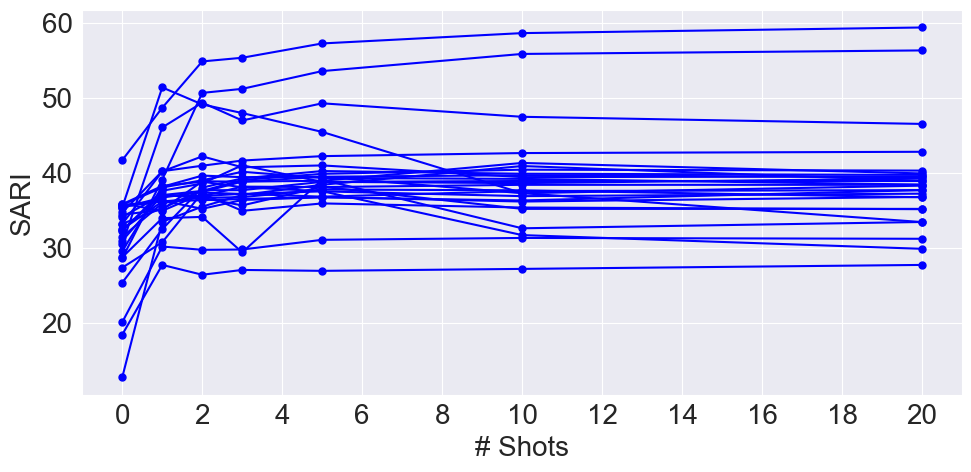

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 5), tight_layout=True)
for language in data:
    for dataset in data[language]:
        ax.plot(k, data[language][dataset]['similarity'], linestyle='solid', color='blue', marker=".", markersize=10)
ax.set_xticks(range(k[0], k[-1]+1, 2))
ax.set_xlabel('# Shots')
ax.set_ylabel('SARI')
# ax.legend(['ur (few-shot)', 'ur (fine-tuned)', 'eu (few-shot)', 'eu (fine-tuned)', 'sl (few-shot)', 'sl (fine-tuned)'], loc='lower right', ncol=3, fontsize=14)
# plt.show()
# ax.set_ylim([15, max(urdu_sim) + 2])
plt.rc('font', size=16)
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.savefig("../output/misc/all_fewshot.pdf", bbox_inches='tight', pad_inches=0)  

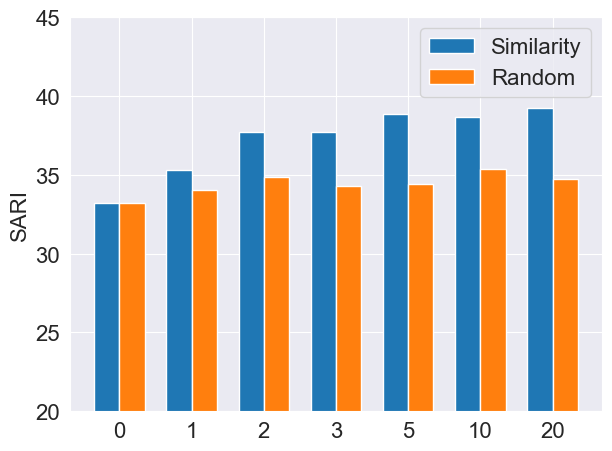

In [58]:
def plot_fewshot(dataset):
    labels = ['0', '1', '2', '3', '5', '10', '20']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, dataset["similarity"], width, label='Similarity')
    rects2 = ax.bar(x + width/2, dataset["random"], width, label='Random')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('SARI')
    ax.set_xticks(x, labels)
    ax.legend()

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)

    ax.set_ylim([20, 45])

    fig.tight_layout()

    plt.show()

plot_fewshot(data["EN"]["NewselaEN"])

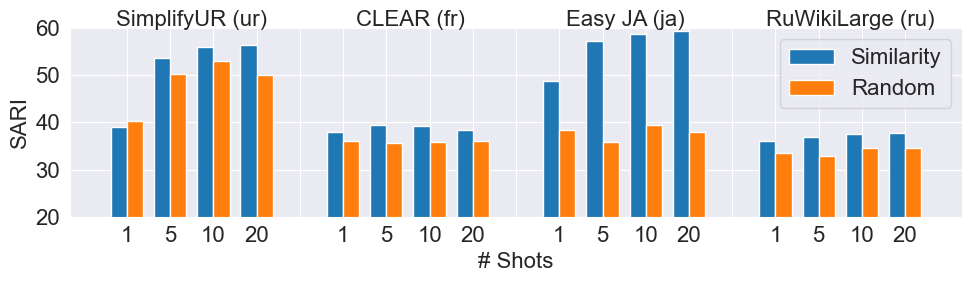

In [185]:
plt.rc('font', size=16)
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

labels = []
dataset = [data["UR"]["SimplifyUR"], data["FR"]["CLEAR"], data["JA"]["Easy JA"], data["RU"]["RuWikiLarge"]]
sim_vals = []
for d in dataset:
    sim_vals += [d["similarity"][1], d["similarity"][4], d["similarity"][5], d["similarity"][6]] + [0]
    labels += ['1', '5', '10', '20', '']
labels = labels[:-1]
sim_vals = sim_vals[:-1]
rand_vals = []
for d in dataset:
    rand_vals += [d["random"][1], d["random"][4], d["random"][5], d["random"][6]] + [0]
rand_vals = rand_vals[:-1]

x = np.arange(len(labels))*0.4  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 3))
rects1 = ax.bar(x - width, sim_vals, width, label='Similarity', align='edge')
rects2 = ax.bar(x, rand_vals, width, label='Random', align='edge')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SARI')
ax.set_xticks(x, labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

ax.set_ylim([20, 60])

plt.figtext(0.13, 0.9, 'SimplifyUR (ur)')
plt.figtext(0.37, 0.9, 'CLEAR (fr)')
plt.figtext(0.58, 0.9, 'Easy JA (ja)')
plt.figtext(0.78, 0.9, 'RuWikiLarge (ru)')

ax.set_xlabel('# Shots')

fig.tight_layout()

plt.savefig("../output/misc/fewshot_results.pdf", bbox_inches='tight', pad_inches=0)  

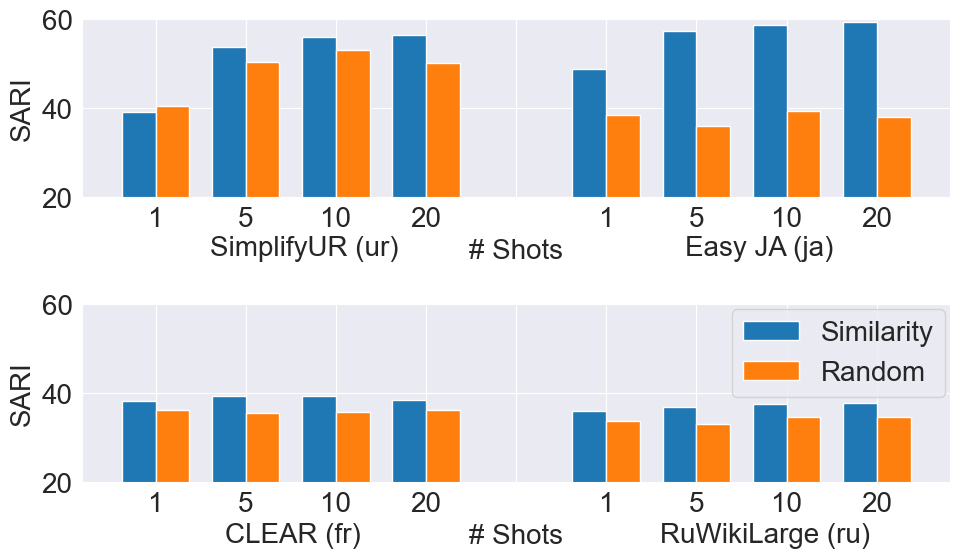

In [205]:
plt.rc('font', size=20)
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize


fig, ax = plt.subplots(2, figsize=(10, 6))

dataset = [data["UR"]["SimplifyUR"], data["FR"]["CLEAR"], data["JA"]["Easy JA"], data["RU"]["RuWikiLarge"]]

def plot_fewshot_pair(ax, data_list):

    labels = []
    
    sim_vals = []
    for d in data_list:
        sim_vals += [d["similarity"][1], d["similarity"][4], d["similarity"][5], d["similarity"][6]] + [0]
        labels += ['1', '5', '10', '20', '']
    labels = labels[:-1]
    sim_vals = sim_vals[:-1]
    rand_vals = []
    for d in data_list:
        rand_vals += [d["random"][1], d["random"][4], d["random"][5], d["random"][6]] + [0]
    rand_vals = rand_vals[:-1]

    x = np.arange(len(labels))*0.4  # the label locations
    width = 0.15  # the width of the bars

    rects1 = ax.bar(x - width, sim_vals, width, label='Similarity', align='edge')
    rects2 = ax.bar(x, rand_vals, width, label='Random', align='edge')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('SARI')
    ax.set_xticks(x, labels)

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)

    ax.set_ylim([20, 60])
    ax.set_xlabel('# Shots')

plot_fewshot_pair(ax[0], [data["UR"]["SimplifyUR"], data["JA"]["Easy JA"]])
plot_fewshot_pair(ax[1], [data["FR"]["CLEAR"], data["RU"]["RuWikiLarge"]])
ax[1].legend(loc='upper right', bbox_to_anchor=(1.01, 1.05))

plt.figtext(0.23, 0.54, 'SimplifyUR (ur)')
plt.figtext(0.705, 0.54, 'Easy JA (ja)')
plt.figtext(0.245, 0.062, 'CLEAR (fr)')
plt.figtext(0.68, 0.062, 'RuWikiLarge (ru)')

fig.tight_layout()

plt.savefig("../output/misc/fewshot_results_condensed.pdf", bbox_inches='tight', pad_inches=0)  